In [1]:
import pandas as pd

# Load the CSV file
file_path = '/Users/sheillapurwandiary/spurwand/BIPM/Semester2/001EABD/portfolio/Giki_Big-Data/cleaned_news_articles.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,source,url,date,time,title,body,summary,keywords,image_url,clean_body
0,CNBC,https://www.cnbc.com/2024/06/24/southeast-asia...,24.06.24,02:51:46 UTC,Southeast Asia is a top choice for firms diver...,"Skyline, Ho Chi Minh City, Vietnam John Harper...","Skyline, Ho Chi Minh City, Vietnam John Harper...","['supply', 'indonesia', 'manufacturing', 'chin...",https://image.cnbcfm.com/api/v1/image/10146887...,skylin ho chi minh citi vietnam john harper ph...
1,CNBC,https://www.cnbc.com/2024/06/24/asia-stock-mar...,24.06.24,03:12:12 UTC,Asia-Pacific markets slip as investors await A...,Asia-Pacific markets mostly fell on Monday as ...,Asia-Pacific markets mostly fell on Monday as ...,"['markets', 'later', 'bank', 'rba', 'central',...",https://image.cnbcfm.com/api/v1/image/10730059...,asiapacif market most fell monday investor awa...
2,CNBC,https://www.cnbc.com/2024/06/24/paris-2024-sin...,24.06.24,00:45:35 UTC,Singaporean swimmer Toh Wei Soong hopes for a ...,"Toh, a Singaporean freestyle and butterfly swi...","Toh, a Singaporean freestyle and butterfly swi...","['paralympic', 'athletes', 'swimmer', 'hopes',...",https://image.cnbcfm.com/api/v1/image/10742765...,toh singaporean freestyl butterfli swimmer set...
3,Financial Times,https://www.ft.com/content/768481a1-60a9-45a3-...,24.06.24,01:37:03 UTC,Live news: Prudential shares rise after announ...,Try unlimited access\n\nOnly 1 € for 4 weeks\n...,Try unlimited accessOnly 1 € for 4 weeksThen 6...,"['trial', '2bn', 'monthcomplete', 'prudential'...",https://www.ft.com/__origami/service/image/v2/...,tri unlimit access eur week eur per month comp...
4,Fortune,https://fortune.com/well/article/best-time-of-...,24.06.24,00:00:00 UTC,"The best time of day to exercise, according to...","Claire Zulkey, a 44-year-old Chicago-area free...",Consider your fitness goalsA small study out o...,"['science', 'morning', 'workouts', 'night', 's...",https://fortune.com/img-assets/wp-content/uplo...,clair zulkey yearold chicagoarea freelanc writ...


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract the text data
texts = data['clean_body'].dropna().tolist()

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to 1000 features for simplicity

# Transform the text data to TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

# Display the shape of the TF-IDF matrix
tfidf_matrix.shape


(35, 1000)

In [3]:
from sklearn.cluster import KMeans

# Number of clusters
k = 5

# Initialize K-means
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the K-means model
kmeans.fit(tfidf_matrix)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original data
data['cluster'] = labels

# Display the first few rows with cluster labels
data[['clean_body', 'cluster']].head()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,clean_body,cluster
0,skylin ho chi minh citi vietnam john harper ph...,3
1,asiapacif market most fell monday investor awa...,2
2,toh singaporean freestyl butterfli swimmer set...,3
3,tri unlimit access eur week eur per month comp...,3
4,clair zulkey yearold chicagoarea freelanc writ...,0


In [4]:
# Get the terms from the TF-IDF vectorizer
terms = tfidf_vectorizer.get_feature_names_out()

# Get the cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Function to get top terms for each cluster
def get_top_terms_per_cluster(centroids, terms, top_n=10):
    top_terms = []
    for i, centroid in enumerate(centroids):
        term_indices = centroid.argsort()[-top_n:]
        top_terms.append([terms[idx] for idx in term_indices])
    return top_terms

# Get top terms for each cluster
top_terms_per_cluster = get_top_terms_per_cluster(centroids, terms)

# Display top terms for each cluster
for i, terms in enumerate(top_terms_per_cluster):
    print(f"Cluster {i}: {', '.join(terms)}")




Cluster 0: hear, even, disciplinari, employ, time, say, usl, narcolepsi, sleep, exercis
Cluster 1: index, polici, inflat, japan, currenc, boj, market, rate, stock, yen
Cluster 2: percent, board, capit, shill, kenya, unit, year, billion, sh, bank
Cluster 3: tariff, ev, chines, toh, eu, taiwan, duti, access, said, china
Cluster 4: chines, us, technolog, chipmak, broadcom, advanc, nvidia, byted, ai, chip


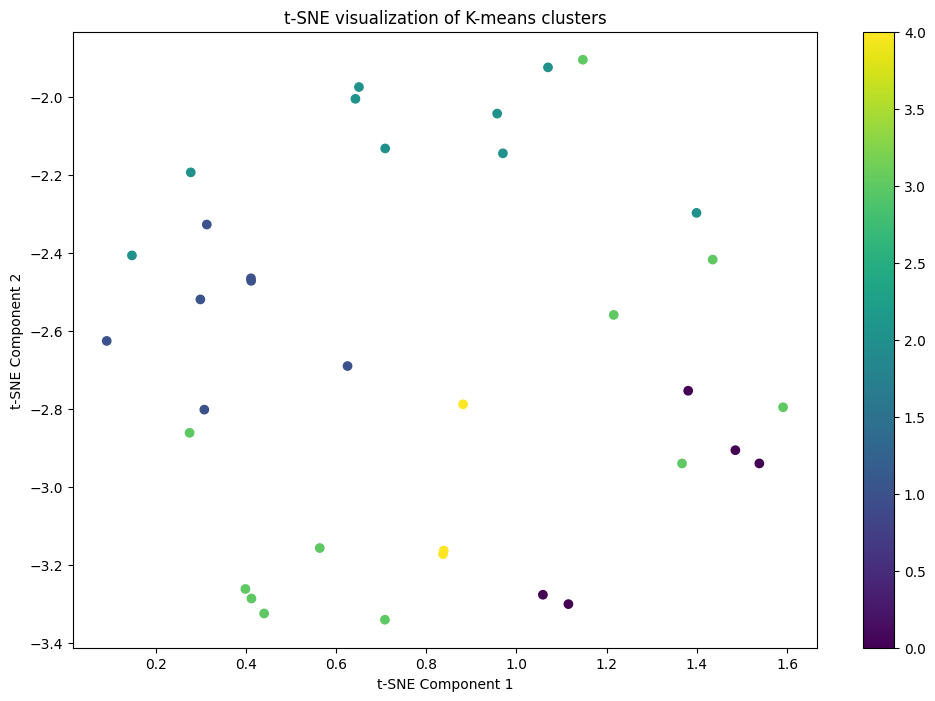

In [8]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_matrix = tsne.fit_transform(tfidf_matrix.toarray())

# Plot the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE visualization of K-means clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


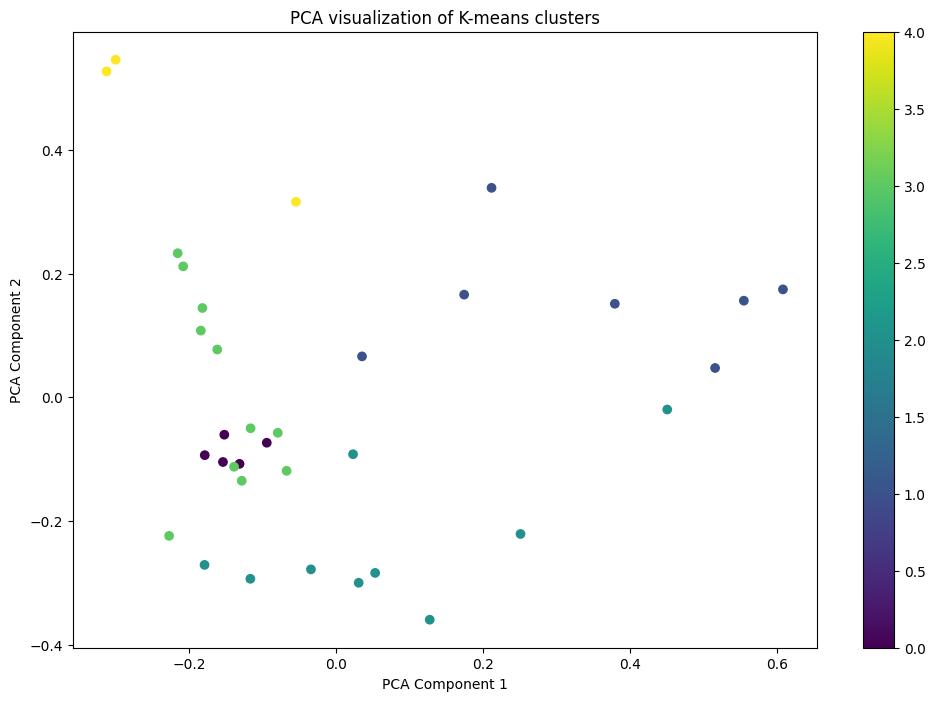

In [9]:
from sklearn.decomposition import PCA

# Reduce dimensions with PCA
pca = PCA(n_components=2, random_state=42)
reduced_matrix = pca.fit_transform(tfidf_matrix.toarray())

# Plot the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('PCA visualization of K-means clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
